# Model Fitting Lecture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#generate some random numbers with values between -0.5 and 0.5, which we'll call "noise"
noise = (np.random.rand(11)-0.5)
noise

array([ 0.38646313, -0.34011451,  0.25532978,  0.41988096, -0.28811562,
        0.00455074, -0.01496145,  0.26668661,  0.46218074,  0.29578784,
       -0.17127192])

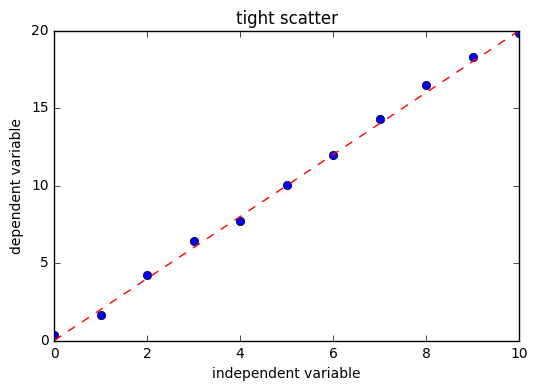

In [3]:
#plot simple relationship y=2x with this noise added
x = np.arange(11)
plt.plot(x,2*x+noise, 'bo')
plt.plot(x,2*x,'r--')
plt.xlim(0,10)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("tight scatter")

In [4]:
#make noisier noise (between -5 and 5)
noise2 = (np.random.rand(11)-0.5)*10
noise2

array([-0.21665973, -1.33867992, -0.94790464,  0.24784799,  0.04981695,
       -3.08284876,  0.12298321,  0.76484517,  2.22470933, -4.38684781,
       -1.50443749])

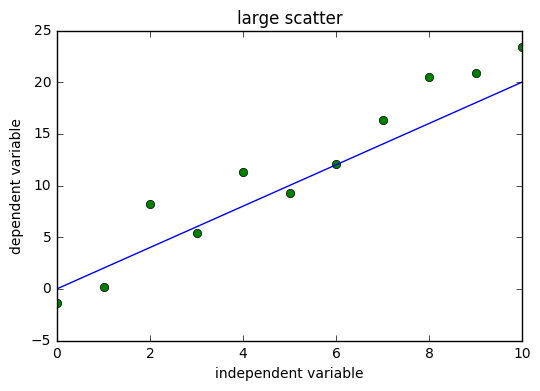

In [5]:
noise = (np.random.rand(11)-0.5)*10
plt.plot(x,2*x+noise, 'go')
plt.plot(x,2*x)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("large scatter")

In [6]:
#compare model and "actual data" (that I made up in this case)
model = 2*x
data = 2*x+noise

errors = model-data
errors

array([ 1.41201756,  1.83709522, -4.2567272 ,  0.5997311 , -3.32145997,
        0.75937598, -0.09878042, -2.36154046, -4.45406664, -2.86914706,
       -3.35721057])

In [7]:
#squaring and square rooting gives us positive distances 
errors_pos = np.sqrt((model-data)**2)
errors_pos

array([ 1.41201756,  1.83709522,  4.2567272 ,  0.5997311 ,  3.32145997,
        0.75937598,  0.09878042,  2.36154046,  4.45406664,  2.86914706,
        3.35721057])

In [8]:
#then add them all up to get a total measure of the difference
total_error = sum(errors_pos)
total_error

25.327152173511429

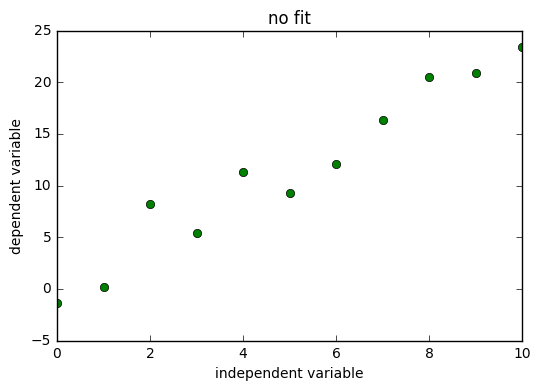

In [9]:
#now, let's assume that I have only the data and no model
plt.plot(x,2*x+noise, 'go')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("no fit")

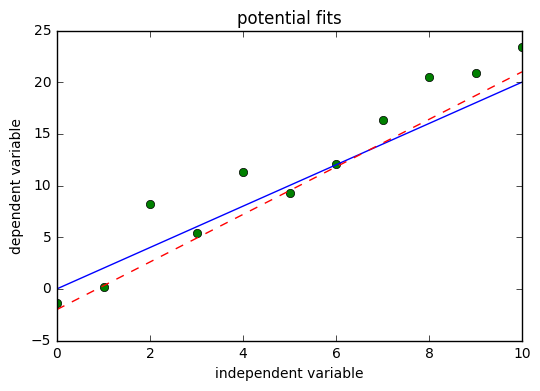

In [10]:
#now this sum of squares metric might allow me to judge the quality of one model relative to another. For example:
plt.plot(x,2*x+noise, 'go')
plt.plot(x,2*x)
plt.plot(x,2.3*x-2,'r--')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("potential fits")

In [11]:
#they both look like reasonable matches to the data, so how do I know which one matches better?
model1 = 2*x
model2 = 2.3*x - 2

error1 = sum(np.sqrt((model1-data)**2))
error2 = sum(np.sqrt((model2-data)**2))
print(error1, error2)

25.3271521735 22.4036548495


In [12]:
#But I can also devise a model other than the one that I used to define the synthetic data that matches better
#than the actual one I used, for example:
model1 = 2*x
model2 = 1.99*x 

error1 = sum(np.sqrt((model1-data)**2))
error2 = sum(np.sqrt((model2-data)**2))
print(error1, error2)

25.3271521735 25.6971521735


this is usually called "least-squares" fitting

# Curve Fitting

In [13]:
#python has lots of built-in functionalities for this kind of thing, but we'll use the scipy optimize curve_fit function
import scipy.optimize as optimization

In [14]:
#to use it, you have to define a functional form for the fit line BUT NOT THE SPECIFIC VALUES

#for linear (straight line) fits this could take two forms

#line without an intercept (intercept zero)
def slopefunc(x,sl):
    return sl*x

#line with an intercept
def slopeintfunc(x,sl,incpt):
    return sl*x+incpt

#we could continue this to functions of arbitraty order
#for example, quadratic:

def quadfunc(x,a,b,c):
    return a+b*x+c*x*x

In [15]:
#then use curve_fit
fit = optimization.curve_fit(slopeintfunc,x,data)

#the zeroth element then contains the optimal parameters for the functional parameters (in this case sl, incpt)
fit[0]

array([ 2.41784538, -0.62461667])

In [16]:
#and the next element contains what's called the covariance matrix
fit[1]

array([[ 0.03796338, -0.18981691],
       [-0.18981691,  1.32871814]])

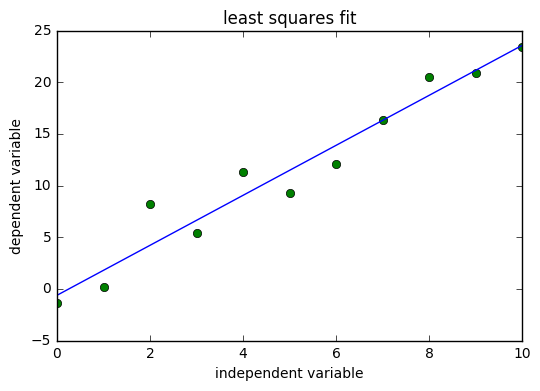

In [17]:
#let's plot it over the data now
plt.plot(x,2*x+noise, 'go')
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("least squares fit")

# Overfitting

since we can define functions to arbitrary dimensions, this can get a bit out of control

In [18]:
def tenparamfunc(x,a,b,c,d,e,f,g,h,i,j):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8+j*x**9

In [19]:
fit2 = optimization.curve_fit(tenparamfunc,x,data)
fit2[0]

array([ -1.41775931e+00,  -9.96432528e+01,   2.34795555e+02,
        -2.06605569e+02,   9.45257823e+01,  -2.50712625e+01,
         3.99625441e+00,  -3.77273245e-01,   1.94284311e-02,
        -4.20349425e-04])

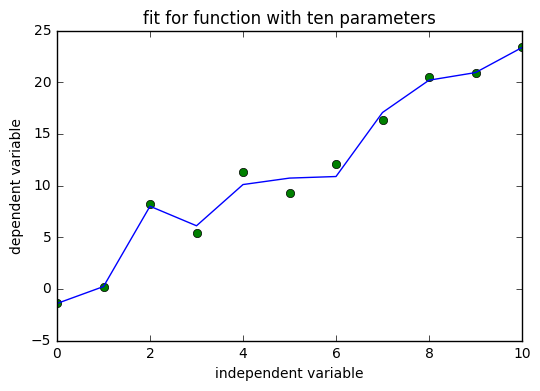

In [20]:
plt.plot(x,2*x+noise, 'go')
c = fit2[0]
plt.plot(x, tenparamfunc(x,c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("fit for function with ten parameters")

### General rule of thumb

Number of parameters in your model should be <<< number of data points

# Fitting with error bars

Often we know enough about how our measurements are taken that we can assign "error bars" or "uncertainties" to our measurements

In [21]:
# equal errors (homoschedastic)
errors_uniform = np.ones(11)

#errors that vary (heteroschedastic)
errors_poisson = np.sqrt(data)


/Users/kfollette/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


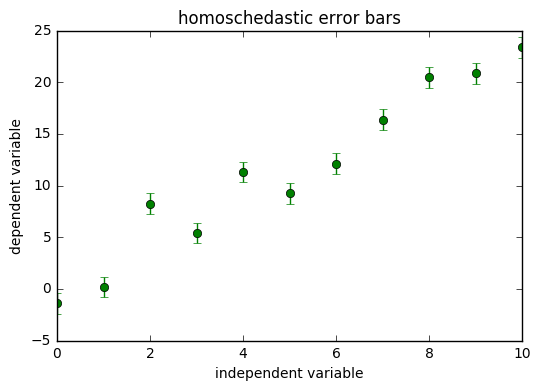

In [22]:
#visualize this
plt.errorbar(x,data,yerr=errors_uniform, fmt='go')
plt.xlim(0,10)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("homoschedastic error bars")

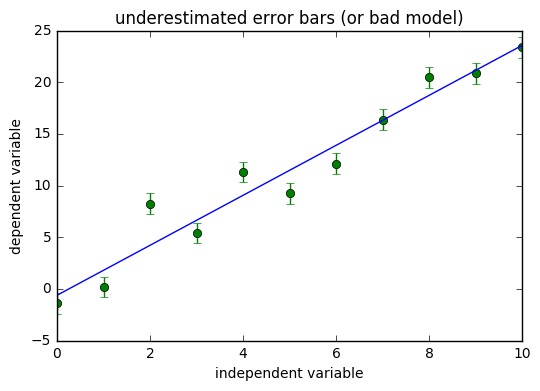

In [23]:
plt.errorbar(x,data,yerr=errors_uniform, fmt='go')
plt.xlim(0,10)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("underestimated error bars (or bad model)")

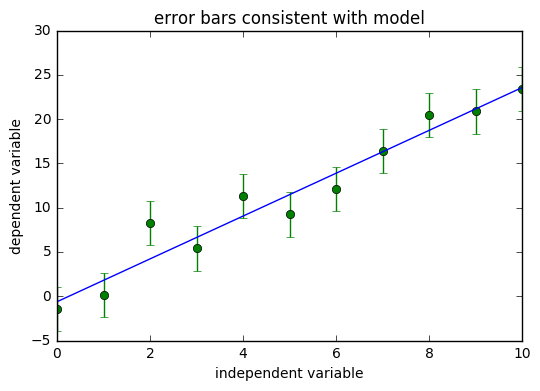

In [24]:
plt.errorbar(x,data,yerr=errors_uniform*2.5, fmt='go')
plt.xlim(0,10)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("error bars consistent with model")

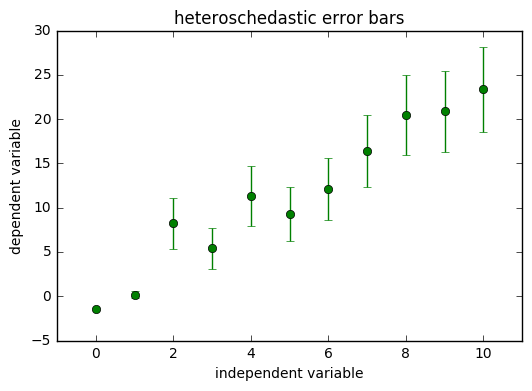

In [25]:
plt.errorbar(x,data,yerr=errors_poisson, fmt='go')
plt.xlim(-1,11)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("heteroschedastic error bars")

# Weighted Least Squares

If we want to take the uncertainty in each of our data points into consideration in calculating goodness of fit, we can extend this to assigning "weights" to each data point. 

Since larger error bars indicate greater uncertainty, these data points should be assigned less weight than other data points with smaller error bars. 

A weight is just like a coefficient in front of the (data-model)$^2$ calculation typical to least squares. More formally:

$$ Q = \sum_{i=1}^nw_i[y_i-f(x_i,\beta)]^2$$

Where $x_i$ is the independent variable, $y_i$ are the observed values, $f(x_i,\beta)$ is the model with some set of parameters $\beta$ and $w_i$ are the weights for each datapoint

A common weight is the reciprocal of the error value squared, or $\frac{1}{\sigma^2}$. Sigma here is the value of the error bar and is not to be confused with a standard deviation, though standard deviation values are often assigned as errors. 

Let's do this for our example of heteroschedastic error bars above

In [26]:
lsq_weighted=sum(1/errors_poisson**2*(data-model)**2)
lsq_weighted

nan

Oops what happened? Well, the model value at x=0 is 0 in this case, and the errors are too, so our 1/errors_poissson statement becomes problematic because we can't divide by zero. 

We can fix this by removing the datapoint from consideration (indeed it's rare that we measure something to be zero anyway, so it was a bit contrived to begin with). 

In [27]:
x3=np.arange(10)+1
model3=2*x3
noise3 = (np.random.rand(10)-0.5)*10
data3= 2*x3+noise3 
errors_poisson3 = np.sqrt(data3)

In [28]:
lsq_weighted=sum(1/errors_poisson3**2*(data3-model3)**2)
lsq_weighted

4.6761326938206498

Similarly, we can build in the uncertainties/weights when we do the least squares fit to the data. As before, the function will minimize the least squares sum to find the best fit, but this time the version with the weights. 

In [29]:
fit_weighted = optimization.curve_fit(slopeintfunc,x3,data3, sigma=errors_poisson3)
fit_unweighted = optimization.curve_fit(slopeintfunc,x3,data3)

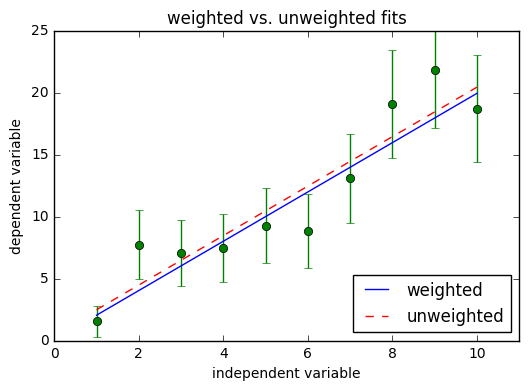

In [30]:
plt.errorbar(x3,data3,yerr=errors_poisson3, fmt='go')
plt.xlim(0,11)
plt.ylim(0,25)
plt.plot(x3, slopeintfunc(x3,fit_weighted[0][0],fit_weighted[0][1]), label='weighted')
plt.plot(x3, slopeintfunc(x3,fit_unweighted[0][0],fit_unweighted[0][1]), 'r--', label='unweighted')
plt.legend(loc='lower right',)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("weighted vs. unweighted fits")

# Chi Squared Test for Goodness of Fit

An alternate "quality of fit" statistic is the so-called chi-squared statistic. It's based on an underlying assumption that the distribution from which each of your measurements (each data point) is drawn is normal, which is usually a reasonable assumption. 

$\chi^2 = \dfrac{(data-model)^2}{model}$

In [31]:
chisq1 = sum((model1-data)**2/model1)
chisq1

/Users/kfollette/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


inf

Why did this break? Well, again because the model has a value of zero at one point, and dividing by zero results in infinity. This is a very real problem with the chi-squared statistic, but we can dance our way around it by removing the datapoint at x=0 from consideration. 

In [32]:
x3=np.arange(10)+1
model3=2*x3
noise3 = (np.random.rand(10)-0.5)*10
data3= 2*x3+noise3 

chisq1 = sum((model3-data3)**2/model3)
chisq1

17.604816912257927

Once you have a value for the chi-squared statistic, you can use it to determine the statistical significance of the difference between the data and model by comparing your computed value to a "critical value" for significance (confidence interval, also known as p value). Usually this is done using a lookup table. In the table shown [here](http://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm), for example, the quantity $\nu$ is the number of "degrees of freedom" which you could think of as just the number of parameters in your model (in this case 2) 